## El dataset que usaremos

Analizaremos data histórica del los últimos 100 años de la economía peruana publicada por el BCRP. 

https://www.bcrp.gob.pe/estadisticas/estadisticas-de-100-anos-del-bcrp.html

*"El 9 de marzo de 1922 se promulgó la Ley de creación del Banco de Reserva del Perú -
BRP- (Ley 4500), el cual inició sus actividades el 4 de abril del mismo año. Las funciones
principales que se le asignó fueron la realización de operaciones monetarias y cambiarias,
la administración de las reservas en el exterior y la emisión de billetes.*   

*Desde sus inicios, el BCRP ha seguido la práctica de divulgar las estadísticas
macroeconómicas, lo que ha sido consagrado en las Constituciones de 1979 y 1993 que
señalan que el Banco Central informa al país, exacta y periódicamente, sobre el estado de
las finanzas nacionales.*    

*La publicación de esta estadística pretende contribuir a la investigación económica
poniendo a disposición de los interesados las series de las principales variables
macroeconómicas de los últimos 100 años."*   



El dataset ya ha sido limpiado en clase y colgado bajo el nombre final_economia_bcrp.csv

### Notas sobre la data

- 1/ El PBI de actividades primarias comprende agricultura, pesca, minería e hidrocarburos. En esta definición de sectores primarios no incluimos la manufactura primaria por no existir series largas de ese subsector, por lo que toda la manufactura está incluida en el sector no primario.
- 2/ El PBI de actividades secundarias manufactura, electricidad, construcción, comercio y servicios. En esta definición los sectores no primarios inluyen toda la manufactura.

## Enrique Sánchez Echevarría

## Primera práctica individual

- La práctica será desarrollada en Jupyter Notebook u otro interfaz que produzca un archivo de formato ipynb. 
- La práctica deberá ser desarrollada de forma individual. 
- Debe ser entregada hasta el jueves 21 de setiembre a las 11:59. Cada hora adicional implica un punto menos en la calificación. Enviarla al correo giancarlo.marchesi@udep.edu.pe. 
- La práctica está diseñada para que la terminen en menos de cuatro horas. Pueden consultar sus notas de clase y cualquier otra fuente que sea necesaria para responder las preguntas. En caso quieran citen directamente a algún autor, hagan la referencia necesaria. 
- Las preguntas tienen un componente de programación y un componente de conocimiento económico. Para el segundo componente, sugiero hacer una búsqueda rápida biblográfica para sustentar los insights de sus respuestas. 
- La calificación de cada una de las 10 preguntas se divide de la siguiente manera: 
        Planteamiento correcto del problema [0.5 puntos]
        Ejecución correcta de código en Python [1 punto]
        Interpretación y comentario [0.5 puntos]

In [1]:
#Importamos librerías necesarias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Importamos la base de datos

df = pd.read_csv("final_economia_bcrp.csv", sep = ",")
df["Año"] = df["Año"].astype(int)
df.head()

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Público,Inversión Bruta Interna,Inversión Bruta Fija,Inversión Bruta Fija - Privada,...,PBI Construcción,PBI Comercio,PBI Servicios,PBI Sectores Primarios,PBI Sectores no Primarios,Inversión Pública_por_pbi,Resultado económico SPNF_por_pbi,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares
0,1922,-4.72,5.1,14122.0,12688.0,10616.0,630.0,1442.0,1783.0,NaN,...,592.0,1987.0,5582.0,4169.0,9953.0,NaN,NaN,5.97,-2.31,0.0
1,1923,-5.07,4.5,14756.0,13103.0,10437.0,677.0,1989.0,2154.0,NaN,...,660.0,2037.0,5807.0,4380.0,10377.0,NaN,NaN,12.68,2.37,0.0
2,1924,3.81,8.9,16070.0,14566.0,11335.0,796.0,2435.0,2519.0,NaN,...,729.0,2182.0,6364.0,4844.0,11226.0,NaN,NaN,3.75,0.00,0.0
3,1925,7.12,3.1,16575.0,15162.0,11272.0,873.0,3017.0,2696.0,NaN,...,736.0,2187.0,6614.0,5012.0,11564.0,NaN,NaN,2.41,3.47,0.0
4,1926,0.55,9.4,18130.0,15776.0,11798.0,1048.0,2931.0,2897.0,NaN,...,820.0,2314.0,7172.0,5666.0,12464.0,NaN,NaN,5.88,-1.12,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año                               100 non-null    int32  
 1   Peru_inflación                    100 non-null    float64
 2   Peru_PBI_por                      100 non-null    float64
 3   PBI                               100 non-null    float64
 4   Demanda Interna                   100 non-null    float64
 5   Consumo Privado                   100 non-null    float64
 6   Consumo Público                   100 non-null    float64
 7   Inversión Bruta Interna           100 non-null    float64
 8   Inversión Bruta Fija              100 non-null    float64
 9   Inversión Bruta Fija - Privada    72 non-null     float64
 10  Inversión Bruta Fija - Pública    72 non-null     float64
 11  Exportaciones de BBySS            100 non-null    float64
 12  Importaci

### 1. Mostrar un gráfico de línea que muestre el promedio móvil de cinco años de la inflación desde el año 1995

El primer año que se graficará será 1999, pues tiene observaciones de los 5 años anteriores (1995, 1996, 1997, 1998 y 1999 inclusive). ¿Desde qué año el promedio la inflación peruana se encuentra debajo del 3 %? ¿Ha habido algún año que se desvía de esta trayectoria? Sugiero utilizar el comando .rolling(window=5).mean() 

In [4]:
#Creamos la columna para la media móvil de 5 años
media_movil = df["Peru_inflación"].rolling(window=5).mean()

df["Media_movil_5"] = media_movil


In [5]:
df[["Año","Media_movil_5"]]

,Año,Media_movil_5
0,1922,NaN
1,1923,NaN
2,1924,NaN
3,1925,NaN
4,1926,0.338
...,...,...
95,2017,3.200
96,2018,2.902
97,2019,2.680
98,2020,2.336


In [6]:
#Identificamos el año 1999
df["Año"][77]

1999

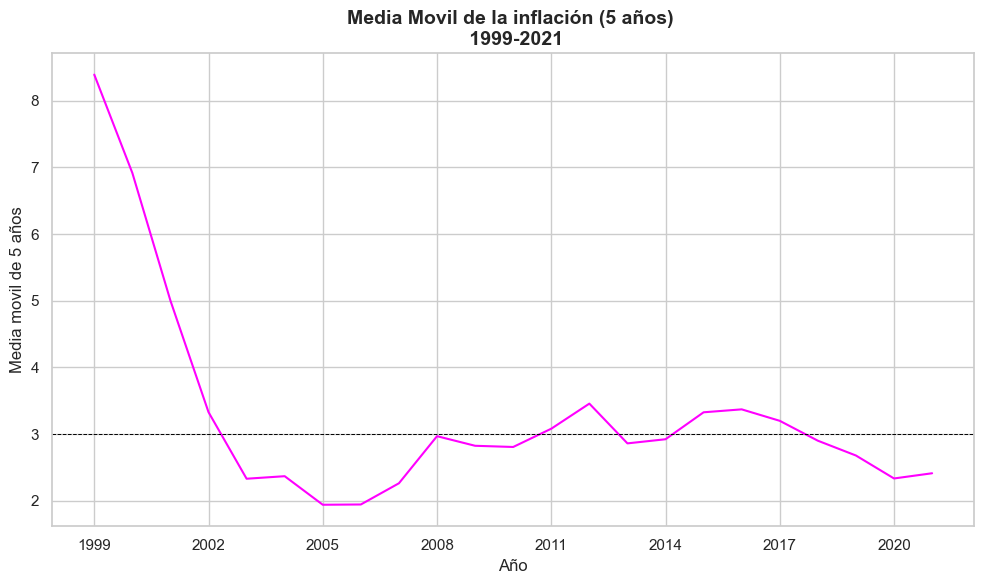

In [7]:
#Graficamos la media móvil:

plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")  
plt.plot(df.Año[77:], df. Media_movil_5 [77:], color = "magenta" )
plt.title("Media Movil de la inflación (5 años) \n 1999-2021", fontsize = 14, fontweight = "bold")
plt.xlabel("Año")
plt.ylabel("Media movil de 5 años")
plt.axhline(3, color='black', linewidth=0.7, linestyle='--')
x_ticks = [i for i in range(1999,2023,3)]
plt.xticks(x_ticks)
plt.grid(True)
plt.tight_layout()
plt.show()

Según el gráfico, durante el año 2002, la economía se estabilizó tras la etapa de Alan García y Fujimori y se mantuvo principalmente en un rango entre 2 y 3%. In embargo, en 2008, alcanza la barrera de 3% y a finales de 2010, la supera hasta 2013 aproximadamente, nuevamente a inicios de 2014 se dispara por encima de la barrera de 3% y vuelve a mediados de 2017, para establecerse nuevamente en el margen indicado inicialmente (2-3%).

### 2. Mostrar un gráfico de línea doble que muestre el tipo de cambio nominal del dólar `TCN(USA)` y el crecimiento del PBI

In [8]:
# Vemos los valores del crecimiento del PBI y el tipo de cambio
df[["Año","Peru_PBI_por","Tipo_de_cambio_dólares"]]

,Año,Peru_PBI_por,Tipo_de_cambio_dólares
0,1922,5.1,0.00
1,1923,4.5,0.00
2,1924,8.9,0.00
3,1925,3.1,0.00
4,1926,9.4,0.00
...,...,...,...
95,2017,2.5,3.26
96,2018,4.0,3.29
97,2019,2.2,3.34
98,2020,-11.0,3.49


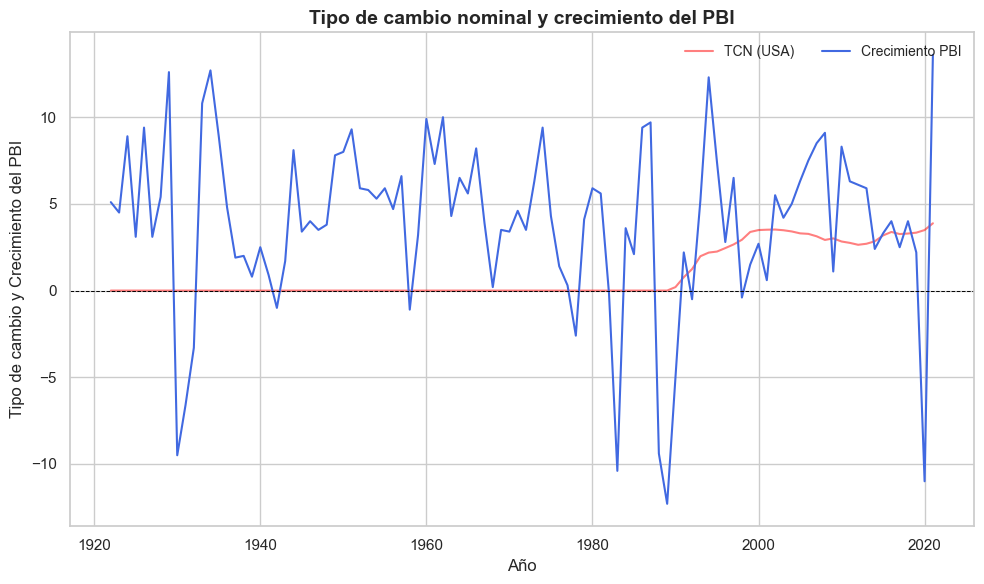

In [9]:
#Graficamos las series
plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")
plt.plot(df.Año[0:], df.Tipo_de_cambio_dólares [0:], label='TCN (USA)', color='red', alpha=0.5 )
plt.plot(df.Año[0:], df.Peru_PBI_por [0:], label='Crecimiento PBI', color='royalblue' )
plt.title("Tipo de cambio nominal y crecimiento del PBI", fontsize = 14, fontweight = "bold")
plt.xlabel("Año")
plt.ylabel("Tipo de cambio y Crecimiento del PBI")
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.legend(frameon=False, loc='upper right', ncol=2, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

¿Hay alguna relación? ¿Debería haberla? ¿Cómo presentarían la data de la manera más clara, dado que la variable de tipo de cambio tiene una buena cantidad de ceros?

Podríamos hacer una ventana que muestre desde 1990 que es donde parece que el tipo de cambio deja de ser cero. Ello nos podría dar una idea de cómo es la relación desde ese periodo, porque sabiendo que la variable ha sido 0 en años previos; entonces, no ha tenido ningún efecto sobre el crecimiento del pbi. El tipo de cambio puede afectar al número de importaciones e inversiones extranjeras, en ese sentido tienen un efecto en algunos componentes del PBI; y por extensión, al crecimiento del mismo. Es cierto que hay una relación, y se espera que haya un efecto de dos formas: Primero, si el tipo de cambio es alto, esto desmotiva a las importaciones, por lo que el PBI aumentaría (X_1 - M_1 > X_2 - M_2); por otro lado, si el tipo de cambio es bajo, podría incentivar a la inversión extranjera dentro del país. Cabe destacar que el tipo de cambio también tiene un efecto directo en la inflación, porque la gente podría buscar refugiarse en el dólar si este está muy valorado.

In [10]:
df["Año"][65]

1987

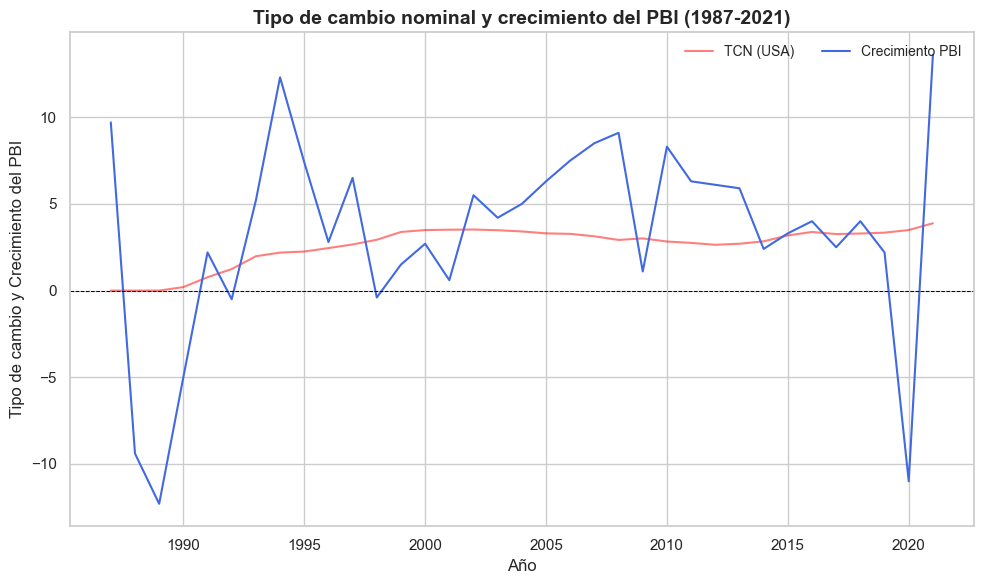

In [11]:
#La ventana para el gráfico sería así:
plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")
plt.plot(df.Año[65:], df.Tipo_de_cambio_dólares [65:], label='TCN (USA)', color='red', alpha=0.5 )
plt.plot(df.Año[65:], df.Peru_PBI_por [65:], label='Crecimiento PBI', color='royalblue' )
plt.title("Tipo de cambio nominal y crecimiento del PBI (1987-2021)", fontsize = 14, fontweight = "bold")
plt.xlabel("Año")
plt.ylabel("Tipo de cambio y Crecimiento del PBI")
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.legend(frameon=False, loc='upper right', ncol=2, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Mostrar un gráfico de barras con los 10 años de mayor crecimiento de PBI durante los 100 años del dataset

Explicar lo ocurrido en 2008, 1994 y 2021 revisando historia económica del Perú. 

In [12]:
#Primero necesitamos los datos para los 10 mayores años del crecimiento del PBI.
df_High_Growth = df.nlargest(10, "Peru_PBI_por")
df_High_Growth

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Público,Inversión Bruta Interna,Inversión Bruta Fija,Inversión Bruta Fija - Privada,...,PBI Comercio,PBI Servicios,PBI Sectores Primarios,PBI Sectores no Primarios,Inversión Pública_por_pbi,Resultado económico SPNF_por_pbi,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares,Media_movil_5
99,2021,3.98,13.6,552312.0,553637.0,358285.0,72318.0,123034.0,141740.0,116350.0,...,58364.0,275119.0,100261.0,450350.0,4.7,-2.5,5.68,7.04,3.88,2.414
12,1934,2.04,12.7,22632.0,19075.0,15602.0,1492.0,1981.0,1879.0,NaN,...,2634.0,9704.0,6998.0,15634.0,NaN,NaN,10.80,1.52,0.00,-3.214
7,1929,-2.69,12.6,22169.0,19304.0,14011.0,1391.0,3902.0,3624.0,NaN,...,2706.0,8798.0,6848.0,15322.0,NaN,NaN,6.52,0.58,0.00,-1.026
72,1994,22.96,12.3,182044.0,176337.0,124433.0,19086.0,32818.0,34352.0,25088.0,...,18381.0,86655.0,34492.0,147552.0,5.0,-2.9,4.03,2.67,2.19,1576.472
11,1933,-2.65,10.8,20081.0,16733.0,14152.0,1289.0,1292.0,1033.0,NaN,...,2286.0,8960.0,6072.0,14009.0,NaN,NaN,-1.20,0.76,0.00,-4.160
40,1962,6.62,10.0,82620.0,76771.0,54666.0,9200.0,12905.0,12476.0,10573.0,...,8318.0,39570.0,16884.0,65736.0,NaN,NaN,6.13,1.33,0.00,8.382
38,1960,8.63,9.9,69946.0,64588.0,46682.0,7578.0,10328.0,8596.0,7740.0,...,7337.0,31777.0,15928.0,54018.0,NaN,NaN,2.57,1.36,0.00,8.428
65,1987,73.86,9.7,200778.0,197356.0,138641.0,26538.0,32177.0,29372.0,21260.0,...,20109.0,98882.0,37836.0,162942.0,4.9,-10.1,3.46,4.43,0.00,103.402
4,1926,0.55,9.4,18130.0,15776.0,11798.0,1048.0,2931.0,2897.0,NaN,...,2314.0,7172.0,5666.0,12464.0,NaN,NaN,5.88,-1.12,0.00,0.338
52,1974,16.88,9.4,147017.0,153528.0,104616.0,18290.0,30622.0,29492.0,19321.0,...,16357.0,72016.0,24666.0,122351.0,8.4,-7.0,-0.54,12.34,0.00,9.082


In [50]:
df[["Año","Peru_PBI_por"]][86:]

,Año,Peru_PBI_por
86,2008,9.1
87,2009,1.1
88,2010,8.3
89,2011,6.3
90,2012,6.1
91,2013,5.9
92,2014,2.4
93,2015,3.3
94,2016,4.0
95,2017,2.5


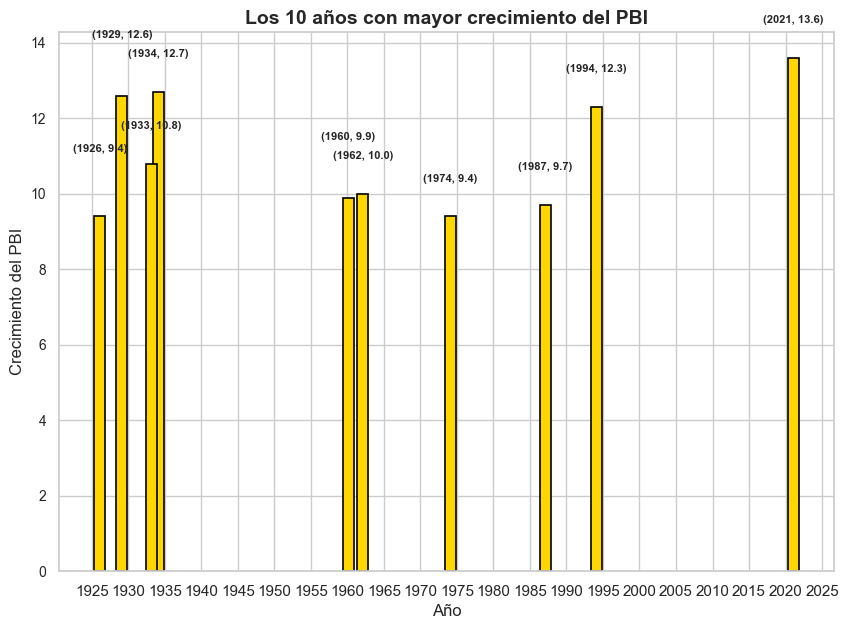

In [13]:
plt.figure(figsize=(10,7))
x=df_High_Growth["Año"]
y=df_High_Growth["Peru_PBI_por"]
bars1=plt.bar(x+0.1, y, color='gold', width=1.5, edgecolor = "black",linewidth = 1.2)

plt.title("Los 10 años con mayor crecimiento del PBI", fontsize=14, fontweight = "bold")
plt.xlabel('Año', fontsize=12)
plt.ylabel('Crecimiento del PBI',  fontsize=12)

x_ticks_1 = [i for i in range(1925,2026,5)]
plt.xticks(x_ticks_1)

plt.yticks(fontsize=10)

#Con este códiggo realizamos las anotaciones de los pares ordenados y nos aseguramos que no esté ninguno encima del otro:
previous_vertical_position = None 

for i, bar in enumerate(bars1):
    year = int(x.iloc[i])
    value = y.iloc[i]

    if value >= 0:
        vertical_position = value + 1
    else:
        vertical_position = value - 3

    # Revisamos si las anotaciones no están cerca de otra:
    if previous_vertical_position is not None and abs(vertical_position - previous_vertical_position) < 0.5:
        vertical_position = previous_vertical_position + 0.5  

    plt.text(bar.get_x() + bar.get_width() / 2, vertical_position, f"({year}, {value:.1f})", ha='center', va='center', fontsize=8, fontweight = "bold")

    previous_vertical_position = vertical_position #Actualiza la posición para el siguiente par ordenado


plt.show()

En 1994, el Estado decidió privatizar algunas áreas, lo que generó que una mejora en estas industrias y al mismo tiempo caja para el estado para poder invertir.  Además, hubo condiciones favorables en el mercado extranejero, lo que aumento las exportaciones y el volumen transado, beneficiando enormemente.

Por otro lado, en 2021 se realizaron muchas políticas para recuperar la economía tras el golpe de la Covid 19. Entonces dado que el PBI cayó en 2020, tiene sentido que con la reactivación de las actividades económicas, y con el inicio de la gente volviendo a las calles tras las campañas de vacunación, la economía haya tenido un crecimiento importante.

Finalmente, en 2008, el crecimiento económico del país estuvo principalmente asociado al aumento en la demanda interna, la cual ha venido creciendo a ritmos superiores a los del PBI durante los últimos tres años, reflejando el dinamismo del consumo privado y de la inversión privada y pública (Memoria BCRP, 2008). Aunque este crecimiento no se encuentre reflejado en el gráfico por ser de 9.1, no suficiente para estar entre los 10 años de mayor crecimiento desde 1922.

### 4. Mostrar un gráfico de barras con los 10 años de menor crecimiento del PBI durante los 100 años del dataset

Explicar lo ocurrido en 1988,1989, 1998 y 2020.  

In [14]:
#Primero necesitamos los datos para los 10 menores años del crecimiento del PBI.
df_Low_Growth = df.nsmallest(10, "Peru_PBI_por")
df_Low_Growth

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Público,Inversión Bruta Interna,Inversión Bruta Fija,Inversión Bruta Fija - Privada,...,PBI Comercio,PBI Servicios,PBI Sectores Primarios,PBI Sectores no Primarios,Inversión Pública_por_pbi,Resultado económico SPNF_por_pbi,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares,Media_movil_5
67,1989,2439.89,-12.3,159436.0,147158.0,106319.0,18091.0,22748.0,21618.0,15242.0,...,15055.0,77660.0,32956.0,126480.0,4.3,-11.3,3.67,4.65,0.00,657.034
98,2020,1.83,-11.0,486402.0,482670.0,318739.0,65414.0,98517.0,105022.0,84694.0,...,49539.0,246014.0,94463.0,391524.0,4.3,-8.9,-3.40,1.36,3.49,2.336
61,1983,103.16,-10.4,158136.0,152822.0,103589.0,23837.0,25396.0,25633.0,14651.0,...,15440.0,76475.0,35043.0,123093.0,9.8,-11.6,4.58,3.79,0.00,72.692
8,1930,-4.52,-9.5,20065.0,17431.0,13190.0,1272.0,2970.0,2285.0,NaN,...,2359.0,8541.0,6366.0,13698.0,NaN,NaN,-8.50,-6.40,0.00,-3.354
66,1988,538.98,-9.4,181822.0,177840.0,127082.0,22354.0,28404.0,24840.0,19321.0,...,18013.0,89586.0,34632.0,147190.0,4.0,-11.5,4.18,4.42,0.00,190.566
9,1931,-6.51,-6.6,18739.0,15806.0,13097.0,1220.0,1489.0,1256.0,NaN,...,2158.0,8370.0,5531.0,13208.0,NaN,NaN,-6.40,-9.32,0.00,-4.766
68,1990,7364.06,-5.0,151492.0,144696.0,105735.0,16249.0,22712.0,21823.0,17159.0,...,14790.0,73918.0,30344.0,121148.0,3.3,-8.9,1.89,6.11,0.20,2098.504
10,1932,-4.43,-3.3,18130.0,15418.0,13067.0,1102.0,1249.0,801.0,NaN,...,2096.0,8438.0,5215.0,12915.0,NaN,NaN,-12.90,-10.27,0.00,-4.890
56,1978,57.85,-2.6,151977.0,141396.0,98306.0,21274.0,21816.0,21846.0,15333.0,...,16141.0,68782.0,33633.0,118344.0,5.7,-6.4,5.54,9.02,0.00,33.978
36,1958,7.94,-1.1,61706.0,60519.0,44274.0,5756.0,10489.0,10192.0,8769.0,...,6048.0,31200.0,11718.0,49988.0,NaN,NaN,-0.74,1.76,0.00,6.182


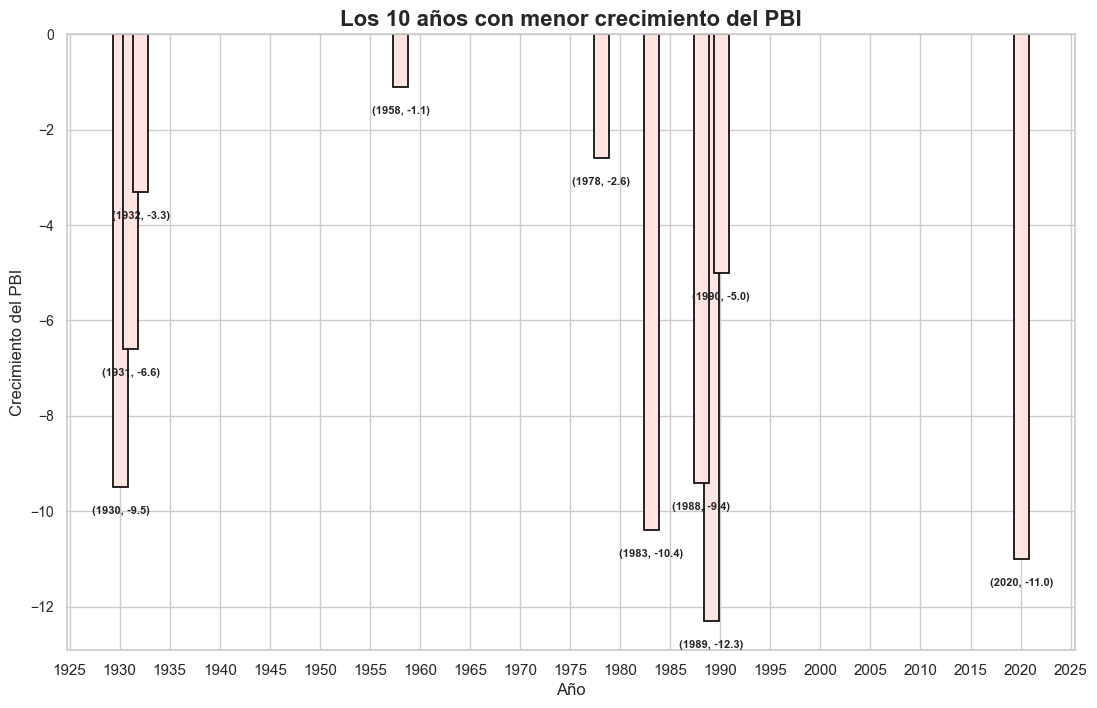

In [15]:
#Graficamos el dataframe obtenido:
plt.figure(figsize=(13,8))
x=df_Low_Growth.Año
y=df_Low_Growth.Peru_PBI_por
bars1=plt.bar(x+0.1, y, color='mistyrose', width=1.5, edgecolor = "black",linewidth = 1.2)

plt.title("Los 10 años con menor crecimiento del PBI", fontsize=16, fontweight= "bold")
plt.xlabel('Año', fontsize=12)
plt.ylabel('Crecimiento del PBI',  fontsize=12)

x_ticks_2 = [i for i in range(1925,2026,5)]
plt.xticks(x_ticks_2)
plt.yticks(fontsize=10)

for i, bar in enumerate(bars1):
    year = int(x.iloc[i])
    value = y.iloc[i]

    if value >= 0:
        vertical_position = value + 1
    else:
        vertical_position = value - 0.5  # Ajusta el valor para que no se tapen entre sí

    plt.text(bar.get_x() + bar.get_width() / 2, vertical_position, f"({year}, {value:.1f})", ha='center', va='center', fontsize=8, fontweight = "bold")


plt.show() 

En 1998-1999, se ven reflejadas las consecuencias de las malas decisiones de Alan García al frente del país, con políticas como la estatización de la banca, generó discordia en la política peruana, y ello sumado al descontento nacional y al creciente terrorismo en el país (que forzó un toque de queda), obligó a disminuir la actividad económica en el país, alcanzando en el 89' la peor caída porcentual del PBI de los últimos 100 años.
En 1998, el Perú se vio atormentado por el fenómeno del niño, que afectó gravemente a la nación, destruyendo cultivos, carreteras, hogares, alterando la situación marítima y reduciendo la pesca.
Y finalmente, 2020 fue el año de la pandemia que forzó a una cuarentena preventiva en distintas partes del mundo, y Perú no fue la excepción. Se redujo drásticamente la actividad económica, pero dada la tecnología moderna, la gente continuo consumiendo en línea, lo que pudo desacelerar un poco la caída del PBI.

### 5. Mostrar un gráfico de barras con los últimos 40 años del crecimiento del PBI

¿Se cumple la teoría del ciclo económico en Perú? Planteen una hipótesis. 

In [16]:
#Identificamos el año 1981
df["Año"][59]

1981

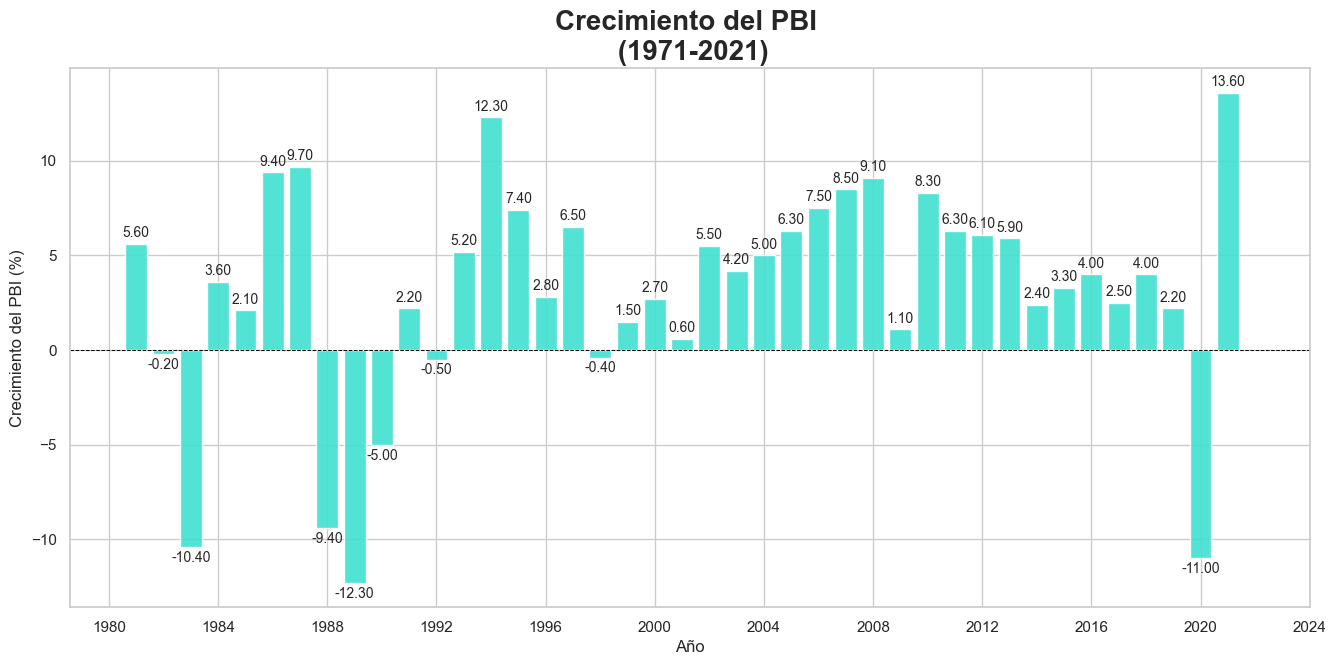

In [17]:
#Graficamos
plt.figure(figsize=(16,7)) 
plt.bar(df.Año [59:], df.Peru_PBI_por [59:], color="turquoise", alpha=0.9)

x_ticks_3 = [i for i in range(1980,2025,4)]
## Manipulando el eje X
plt.xlabel('Año')
plt.xticks(x_ticks_3) 
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')

## Manipulando el eje Y
plt.ylabel("Crecimiento del PBI (%)")


## Agregando los valores a las columnas
for i, value in enumerate(df['Peru_PBI_por'][59:]):
    year = df['Año'][i + 59]
    
    if value >= 0:
        vertical_position = value + 0.2
        va = 'bottom'
    else:
        vertical_position = value - 0.2
        va = 'top'
    
    plt.text(year, vertical_position, f"{value:.2f}", ha='center', va=va, fontsize=10)



plt.title("Crecimiento del PBI \n (1971-2021)", fontsize=20, fontweight = "bold") 
plt.show()

Según el presente gráfico, pareciera que no se cumple la teoría del ciclo económico. Considerando que desde el 2000 no parece haber una tendencia clara que muestre un crecimiento cada vez menor hasta decrecer y luego volver a aumentar, sino que parece algo más esporádico. Desde el 2002 se nota un crecimiento continuo no solo en el PBI, sino en la tasa a la que este crece, y en 2009 con la crisis hubo una caída abrupta, para que al siguiente año se recuperara. En ese sentido, no se pueden apreciar las fluctuaciones que uno esperaría de un ciclo económico.

### 6. Mostrar un gráfico de línea doble en que se compara el crecimiento de PBI del Perú de la pregunta anterior contra el crecimiento de EEUU. 

¿Qué información nueva nos proporciona esta comparación? ¿Se cumple la teoría del ciclo económico en EEUU? ¿Existe mayor o menor coincidencia en las tasas de crecimiento despúes de 1994?

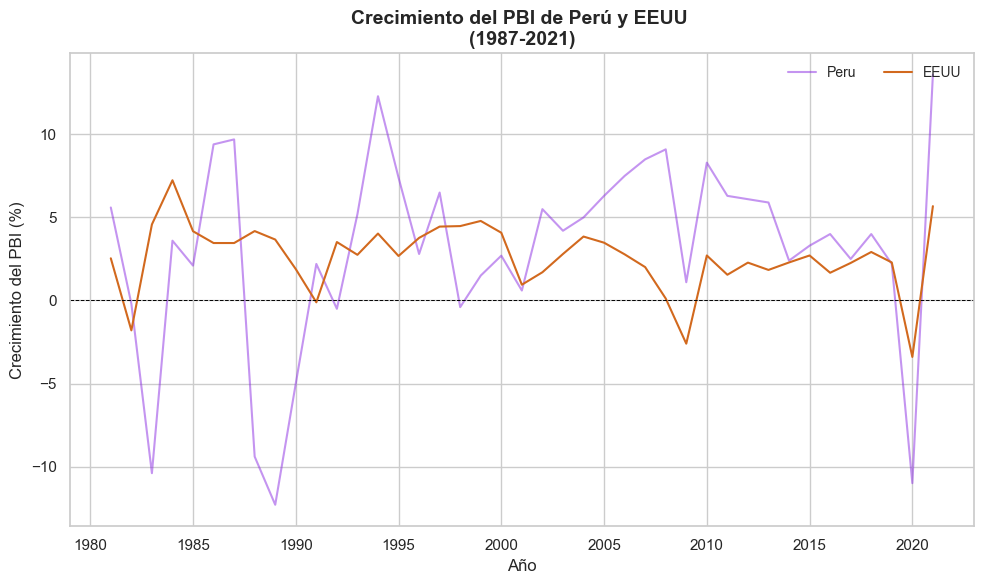

In [52]:
#Graficamos
plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")
plt.plot(df.Año[59:], df.Peru_PBI_por[59:], label='Peru', color='blueviolet', alpha=0.5 )
plt.plot(df.Año[59:], df.EEUU_PBI_por [59:], label='EEUU', color='chocolate' )
plt.title("Crecimiento del PBI de Perú y EEUU \n(1987-2021)", fontsize = 14, fontweight = "bold")
plt.xlabel("Año")
plt.ylabel("Crecimiento del PBI (%)")
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.legend(frameon=False, loc='upper right', ncol=2, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra mejor las fluctuaciones y pareciera que ahora sí se cumple el ciclo económico tanto para EEUU como par Perú. Cabe destacar que algunas caídas han sido más notorias que otras comoo la del 88 y 89 en Perú. Salta también a la vista, que EEUU ha tenido un crecimiento más sostenido y estable que el peruano: claramente las caídas en Perú son mucho más acentuadas que las caídas en el PBI estadounidense, aunque también es cierto que los  periodos de crecimiento también han sido más acentuados para el caso peruano.

### 7. Crear dos columnas en el dataframe que simbolicen el cambio porcentual de la inversión bruta fija pública  y privada. Mostrar un gráfico de dispersión de ambos cambios.

¿Cómo se relacionan ambas variables? Plantear una hipotesis sobre esta relación. Mostrar las etiquetas de los años. Si el gráfico se ve denso, considerar acortar el periodo de información a 40, 35 o 30 años para explicar su hipótesis. 
- Exploren el método .pct_change()

In [19]:
df.columns

Index(['Año', 'Peru_inflación', 'Peru_PBI_por', 'PBI', 'Demanda Interna',
       'Consumo Privado', 'Consumo Público', 'Inversión Bruta Interna',
       'Inversión Bruta Fija', 'Inversión Bruta Fija - Privada',
       'Inversión Bruta Fija - Pública', 'Exportaciones de BBySS',
       'Importaciones de BBySS', 'PBI Agropecuario', 'PBI Pesca',
       'PBI Minería e Hidrocarburos', 'PBI Manufactura',
       'PBI Electricidad y Agua ', 'PBI Construcción', 'PBI Comercio',
       'PBI Servicios', 'PBI Sectores Primarios', 'PBI Sectores no Primarios',
       'Inversión Pública_por_pbi', 'Resultado económico SPNF_por_pbi',
       'EEUU_PBI_por', 'EEUU_inflación', 'Tipo_de_cambio_dólares',
       'Media_movil_5'],
      dtype='object')

In [20]:
#Identificamos las variables de interés
df[["Año","Inversión Bruta Fija - Privada", "Inversión Bruta Fija - Pública"]]

,Año,Inversión Bruta Fija - Privada,Inversión Bruta Fija - Pública
0,1922,NaN,NaN
1,1923,NaN,NaN
2,1924,NaN,NaN
3,1925,NaN,NaN
4,1926,NaN,NaN
...,...,...,...
95,2017,93193.0,23034.0
96,2018,97029.0,24300.0
97,2019,101406.0,23930.0
98,2020,84694.0,20328.0


In [21]:
#Calculamos el cambio porcentual
df["IBF_Priv_cambio_por"] = df["Inversión Bruta Fija - Privada"].pct_change() * 100
df["IBF_Púb_cambio_por"] = df["Inversión Bruta Fija - Pública"].pct_change() * 100

In [22]:
df[["Año", "IBF_Priv_cambio_por", "IBF_Púb_cambio_por"]]

,Año,IBF_Priv_cambio_por,IBF_Púb_cambio_por
0,1922,NaN,NaN
1,1923,NaN,NaN
2,1924,NaN,NaN
3,1925,NaN,NaN
4,1926,NaN,NaN
...,...,...,...
95,2017,0.036497,-1.794926
96,2018,4.116189,5.496223
97,2019,4.511022,-1.522634
98,2020,-16.480287,-15.052236


Para mostrar el gráfico nos centraremos en los últimos 40 años.

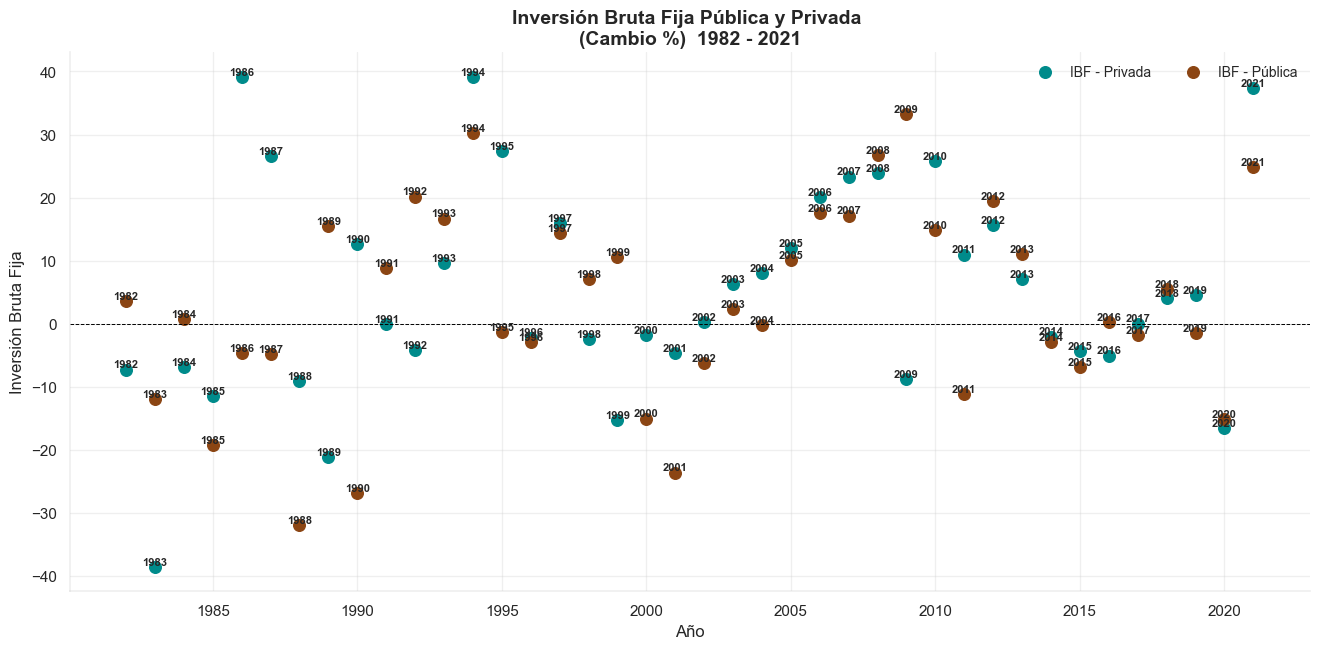

In [23]:
# Graficamos
plt.figure(figsize=(16, 7))
x = df['Año'][60:]
y_privada = df['IBF_Priv_cambio_por'][60:]
y_publica = df['IBF_Púb_cambio_por'][60:]

plt.scatter(x, y_privada, s=70, c="darkcyan", label="IBF - Privada")
plt.scatter(x, y_publica, s=70, c="saddlebrown", label="IBF - Pública")

# Título y marcadores
plt.title("Inversión Bruta Fija Pública y Privada \n(Cambio %)  1982 - 2021", fontsize=14, fontweight = "bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Inversión Bruta Fija", fontsize=12)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')

for i, year in enumerate(x):
    plt.text(year, y_privada.iloc[i], str(year), ha='center', va='bottom', fontsize=8, fontweight='bold')
    plt.text(year, y_publica.iloc[i], str(year), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.legend(frameon=False, loc='upper right', ncol=2, fontsize=10)
plt.show()



Este gráfico muestra que ambos siguen la misma tendencia. En su mayoría han aumentado y caído juntos, exceptuando el periodo del primer gobierno de García. Ello nos parece indicar que tienen una correlación positiva y fuerte, pues cuando uno crece, usualmente el segundo también crece. Podría ser interesante evaluar esta hipótesis.

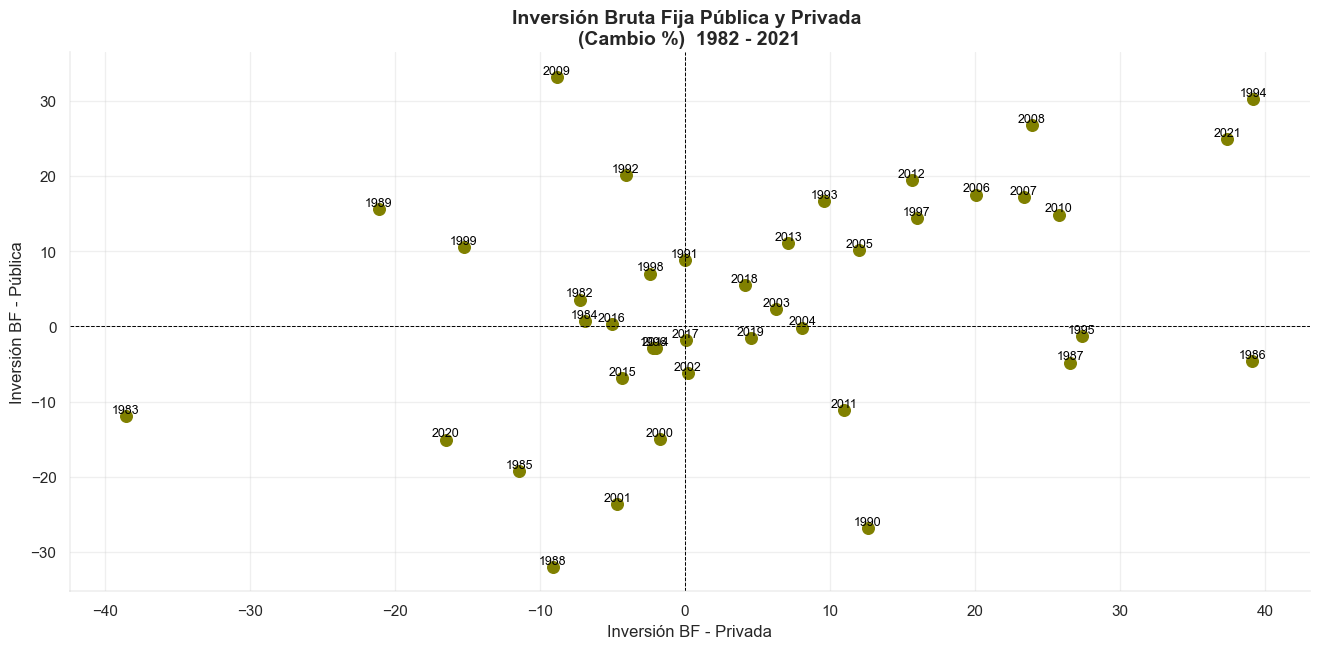

In [47]:
# Graficamos
plt.figure(figsize=(16, 7))
x = df['Año'][60:]
x_privada = df['IBF_Priv_cambio_por'][60:]
y_publica = df['IBF_Púb_cambio_por'][60:]

plt.scatter(x_privada,y_publica, s=70, c="olive")

# Título y marcadores
plt.title("Inversión Bruta Fija Pública y Privada \n(Cambio %)  1982 - 2021", fontsize=14, fontweight = "bold")
plt.xlabel("Inversión BF - Privada", fontsize=12)
plt.ylabel("Inversión BF - Pública", fontsize=12)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.axvline(0, color='black', linewidth=0.7, linestyle='--')

for year, x_val, y_val in zip(df['Año'][60:], x_privada, y_publica):
    plt.annotate(str(year), (x_val, y_val), fontsize=9, color='black', ha='center', va='bottom')

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()


Este gráfico muestra cómo la inversión privada se correlaciona con la inversión pública. Y aunque parece que efectivamente hay varios puntos que apoyan la idea de que cuando uno crece el otro también. Hay varios puntos que no coinciden con esta hipótesis y no muestran una correlación tan clara, como se podía considerar con el primer gráfico. 

### 8. Mostrar un mediante barras acumuladas, desde el 2010 hasta el 2011 la composición de PBI por gasto. Asegurarse que el total sume la columna PBI en millones de soles.  

Emplearemos dos métodos para mostrar las barras acumuladas:
1) por medio de Balanza Comercial (Exportaciones - Importaciones)
2) Graficando exportaciones e importaciones en la barra

In [24]:
df.columns

Index(['Año', 'Peru_inflación', 'Peru_PBI_por', 'PBI', 'Demanda Interna',
       'Consumo Privado', 'Consumo Público', 'Inversión Bruta Interna',
       'Inversión Bruta Fija', 'Inversión Bruta Fija - Privada',
       'Inversión Bruta Fija - Pública', 'Exportaciones de BBySS',
       'Importaciones de BBySS', 'PBI Agropecuario', 'PBI Pesca',
       'PBI Minería e Hidrocarburos', 'PBI Manufactura',
       'PBI Electricidad y Agua ', 'PBI Construcción', 'PBI Comercio',
       'PBI Servicios', 'PBI Sectores Primarios', 'PBI Sectores no Primarios',
       'Inversión Pública_por_pbi', 'Resultado económico SPNF_por_pbi',
       'EEUU_PBI_por', 'EEUU_inflación', 'Tipo_de_cambio_dólares',
       'Media_movil_5', 'IBF_Priv_cambio_por', 'IBF_Púb_cambio_por'],
      dtype='object')

In [25]:
df["Año"][88]

2010

In [26]:
columns_8 = ["Año",'Consumo Privado', 'Consumo Público', 'Inversión Bruta Interna', 'Exportaciones de BBySS',
       'Importaciones de BBySS',"PBI"]
df_8 = df.loc[88:,columns_8]
# Creamos Balanza comercial para poder gráficar mejor y sea más evidente si las importaciones o las exportaciones fueron mayores.
df_8["Balanza Comercial"] = df_8["Exportaciones de BBySS"] - df_8["Importaciones de BBySS"]
# 
df_8 = df_8[["Año",'Consumo Privado', 'Consumo Público', 'Inversión Bruta Interna', 'Exportaciones de BBySS',
       'Importaciones de BBySS',"Balanza Comercial","PBI"]]
df_8

,Año,Consumo Privado,Consumo Público,Inversión Bruta Interna,Exportaciones de BBySS,Importaciones de BBySS,Balanza Comercial,PBI
88,2010,235492.0,42036.0,96579.0,105999.0,98026.0,7973.0,382081.0
89,2011,252507.0,44063.0,106090.0,112502.0,108905.0,3597.0,406256.0
90,2012,271305.0,47634.0,114138.0,119046.0,120924.0,-1878.0,431199.0
91,2013,286857.0,50802.0,127037.0,117817.0,126078.0,-8261.0,456435.0
92,2014,298045.0,53845.0,123837.0,116269.0,124688.0,-8419.0,467308.0
93,2015,309917.0,59148.0,119880.0,120219.0,126658.0,-6439.0,482506.0
94,2016,321383.0,58798.0,114907.0,131080.0,124587.0,6493.0,501581.0
95,2017,329870.0,59191.0,114408.0,140989.0,130243.0,10746.0,514215.0
96,2018,342501.0,59417.0,121994.0,144059.0,133306.0,10753.0,534665.0
97,2019,353615.0,60702.0,121260.0,145697.0,134669.0,11028.0,546605.0


In [27]:
gasto_pbi = ['Consumo Privado', 'Consumo Público', 'Inversión Bruta Interna',
       'Exportaciones de BBySS']

# Sumamos las columnas y le restamos las importaciones:
suma_factores_gasto_pbi = df_8[gasto_pbi].sum(axis=1) - df_8["Importaciones de BBySS"]

# Añadimos la nueva variable al df:
df_8["PBI_Gasto_Suma"] = suma_factores_gasto_pbi

df_8

,Año,Consumo Privado,Consumo Público,Inversión Bruta Interna,Exportaciones de BBySS,Importaciones de BBySS,Balanza Comercial,PBI,PBI_Gasto_Suma
88,2010,235492.0,42036.0,96579.0,105999.0,98026.0,7973.0,382081.0,382080.0
89,2011,252507.0,44063.0,106090.0,112502.0,108905.0,3597.0,406256.0,406257.0
90,2012,271305.0,47634.0,114138.0,119046.0,120924.0,-1878.0,431199.0,431199.0
91,2013,286857.0,50802.0,127037.0,117817.0,126078.0,-8261.0,456435.0,456435.0
92,2014,298045.0,53845.0,123837.0,116269.0,124688.0,-8419.0,467308.0,467308.0
93,2015,309917.0,59148.0,119880.0,120219.0,126658.0,-6439.0,482506.0,482506.0
94,2016,321383.0,58798.0,114907.0,131080.0,124587.0,6493.0,501581.0,501581.0
95,2017,329870.0,59191.0,114408.0,140989.0,130243.0,10746.0,514215.0,514215.0
96,2018,342501.0,59417.0,121994.0,144059.0,133306.0,10753.0,534665.0,534665.0
97,2019,353615.0,60702.0,121260.0,145697.0,134669.0,11028.0,546605.0,546605.0


#### Método 1

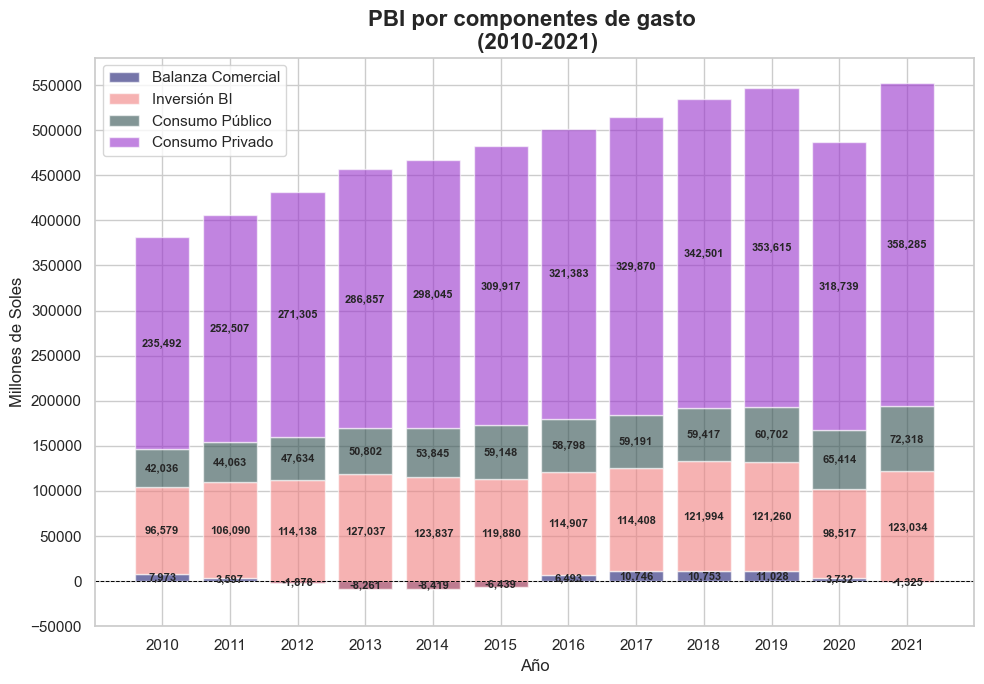

In [28]:
years = df_8['Año'].values
balanza_comercial = df_8["Balanza Comercial"].values
inversion = df_8["Inversión Bruta Interna"].values
consumo_público = df_8["Consumo Público"].values
consumo_privado = df_8["Consumo Privado"].values

plt.figure(figsize=(10, 7))

# Graficando las barras
bar1 = plt.bar(years, balanza_comercial, label="Balanza Comercial",color = "midnightblue", alpha = 0.6 )
bar2 = plt.bar(years, inversion, bottom= balanza_comercial, label="Inversión BI", color='lightcoral', alpha=0.6)
bar3 = plt.bar(years, consumo_público, bottom=balanza_comercial + inversion, label="Consumo Público", color='darkslategray', alpha=0.6)
bar4 = plt.bar(years, consumo_privado, bottom=balanza_comercial+ inversion + consumo_público, label="Consumo Privado", color='darkorchid', alpha=0.6)

for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        bottom = bar.get_y()
        top = bottom + height

        # Calculamos el punto medio de la barra
        midpoint = (bottom + top) / 2

        plt.annotate(
            f'{int(height):,}',
            xy=(bar.get_x() + bar.get_width() / 2, midpoint),
            xytext=(0, 0),  # No vertical offset
            textcoords="offset points",
            ha='center', va='center', fontsize=8, fontweight='bold'
        )

#Manipulamos ejes, leyenda y título
x_ticks_5 = [i for i in range(2010,2022)]
y_ticks0 = [i for i in range(-50000,600000,50000)]
plt.title('PBI por componentes de gasto \n (2010-2021)', fontweight = "bold", fontsize = 16)
plt.xlabel('Año')
plt.xticks(x_ticks_5)
plt.yticks(y_ticks0)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.ylabel('Millones de Soles')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Método 2

In [29]:
df_8["Importaciones (-1)"] = df_8["Importaciones de BBySS"] * -1

df_8

,Año,Consumo Privado,Consumo Público,Inversión Bruta Interna,Exportaciones de BBySS,Importaciones de BBySS,Balanza Comercial,PBI,PBI_Gasto_Suma,Importaciones (-1)
88,2010,235492.0,42036.0,96579.0,105999.0,98026.0,7973.0,382081.0,382080.0,-98026.0
89,2011,252507.0,44063.0,106090.0,112502.0,108905.0,3597.0,406256.0,406257.0,-108905.0
90,2012,271305.0,47634.0,114138.0,119046.0,120924.0,-1878.0,431199.0,431199.0,-120924.0
91,2013,286857.0,50802.0,127037.0,117817.0,126078.0,-8261.0,456435.0,456435.0,-126078.0
92,2014,298045.0,53845.0,123837.0,116269.0,124688.0,-8419.0,467308.0,467308.0,-124688.0
93,2015,309917.0,59148.0,119880.0,120219.0,126658.0,-6439.0,482506.0,482506.0,-126658.0
94,2016,321383.0,58798.0,114907.0,131080.0,124587.0,6493.0,501581.0,501581.0,-124587.0
95,2017,329870.0,59191.0,114408.0,140989.0,130243.0,10746.0,514215.0,514215.0,-130243.0
96,2018,342501.0,59417.0,121994.0,144059.0,133306.0,10753.0,534665.0,534665.0,-133306.0
97,2019,353615.0,60702.0,121260.0,145697.0,134669.0,11028.0,546605.0,546605.0,-134669.0


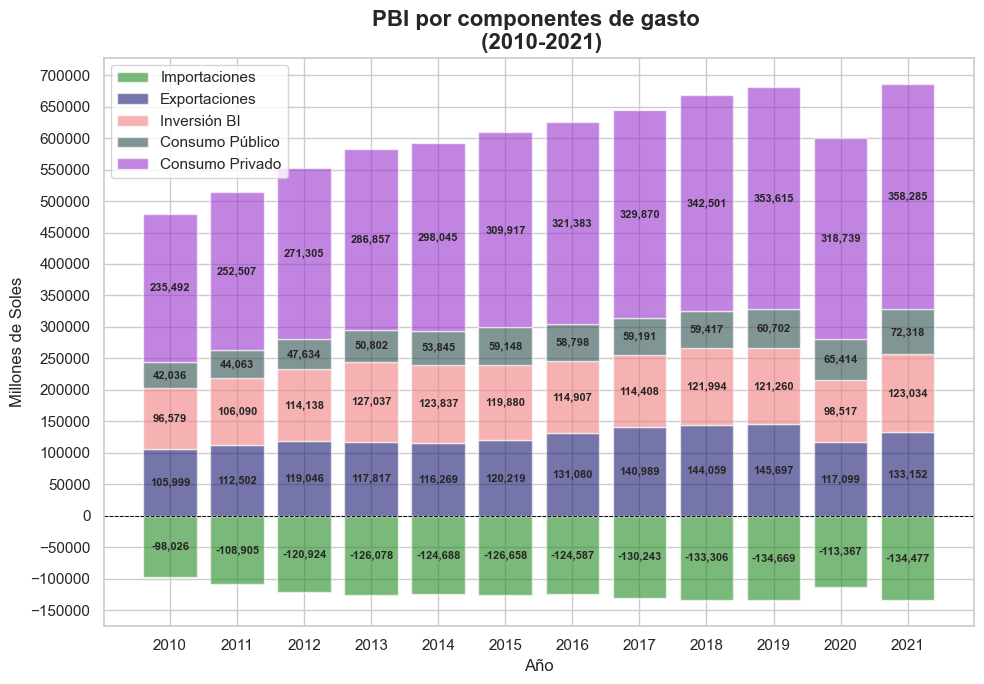

In [30]:
years = df_8['Año'].values
importaciones = df_8["Importaciones (-1)"].values
exportaciones = df_8["Exportaciones de BBySS"].values
inversion = df_8["Inversión Bruta Interna"].values
consumo_público = df_8["Consumo Público"].values
consumo_privado = df_8["Consumo Privado"].values

plt.figure(figsize=(10, 7))

# Graficamos las barras
bar1 = plt.bar(years, importaciones, label="Importaciones", color="forestgreen", alpha=0.6)
bar2 = plt.bar(years,exportaciones, label="Exportaciones",color = "midnightblue", alpha = 0.6 )
bar3 =plt.bar(years, inversion, bottom= exportaciones, label="Inversión BI", color='lightcoral', alpha=0.6)
bar4 = plt.bar(years, consumo_público, bottom=exportaciones + inversion, label="Consumo Público", color='darkslategray', alpha=0.6)
bar5 = plt.bar(years, consumo_privado, bottom=exportaciones + inversion + consumo_público, label="Consumo Privado", color='darkorchid', alpha=0.6)


for bars in [bar1, bar2, bar3, bar4, bar5]:
    for bar in bars:
        height = bar.get_height()
        bottom = bar.get_y()
        top = bottom + height

        # Calculamos el punto medio
        midpoint = (bottom + top) / 2

        plt.annotate(
            f'{int(height):,}',
            xy=(bar.get_x() + bar.get_width() / 2, midpoint),
            xytext=(0, 0),  # No vertical offset
            textcoords="offset points",
            ha='center', va='center', fontsize=8, fontweight='bold'
        )


#Manipulamos ejes, leyendas y título
x_ticks_5 = [i for i in range(2010,2022)]
y_ticks = [i for i in range(-150000,750000,50000)]
plt.title('PBI por componentes de gasto \n (2010-2021)', fontweight = "bold", fontsize = 16)
plt.xlabel('Año')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.xticks(x_ticks_5)
plt.yticks(y_ticks)
plt.ylabel('Millones de Soles')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 9. Crear una nueva columna que sume los PBI sectoriales, una nueva columa que sume PBI Sectores Primarios y PBI sectores no Primarios. Comparar ambas nuevas columnas con la cifra de PBI. ¿Son iguales para todos los años? 

No es necesario graficar esta pregunta. Puede ser respondida creando un nuevo dataframe que explique la respuesta. 

In [31]:
df.columns

Index(['Año', 'Peru_inflación', 'Peru_PBI_por', 'PBI', 'Demanda Interna',
       'Consumo Privado', 'Consumo Público', 'Inversión Bruta Interna',
       'Inversión Bruta Fija', 'Inversión Bruta Fija - Privada',
       'Inversión Bruta Fija - Pública', 'Exportaciones de BBySS',
       'Importaciones de BBySS', 'PBI Agropecuario', 'PBI Pesca',
       'PBI Minería e Hidrocarburos', 'PBI Manufactura',
       'PBI Electricidad y Agua ', 'PBI Construcción', 'PBI Comercio',
       'PBI Servicios', 'PBI Sectores Primarios', 'PBI Sectores no Primarios',
       'Inversión Pública_por_pbi', 'Resultado económico SPNF_por_pbi',
       'EEUU_PBI_por', 'EEUU_inflación', 'Tipo_de_cambio_dólares',
       'Media_movil_5', 'IBF_Priv_cambio_por', 'IBF_Púb_cambio_por'],
      dtype='object')

In [32]:
df[['Año','PBI Agropecuario', 'PBI Pesca',
       'PBI Minería e Hidrocarburos', 'PBI Manufactura',
       'PBI Electricidad y Agua ', 'PBI Construcción', 'PBI Comercio',
       'PBI Servicios','PBI Sectores Primarios', 'PBI Sectores no Primarios']]

,Año,PBI Agropecuario,PBI Pesca,PBI Minería e Hidrocarburos,PBI Manufactura,PBI Electricidad y Agua,PBI Construcción,PBI Comercio,PBI Servicios,PBI Sectores Primarios,PBI Sectores no Primarios
0,1922,2519.0,NaN,1650.0,1774.0,19.0,592.0,1987.0,5582.0,4169.0,9953.0
1,1923,2522.0,NaN,1858.0,1853.0,20.0,660.0,2037.0,5807.0,4380.0,10377.0
2,1924,2625.0,NaN,2219.0,1930.0,21.0,729.0,2182.0,6364.0,4844.0,11226.0
3,1925,2555.0,NaN,2456.0,2005.0,22.0,736.0,2187.0,6614.0,5012.0,11564.0
4,1926,2752.0,NaN,2914.0,2135.0,23.0,820.0,2314.0,7172.0,5666.0,12464.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2017,27328.0,1921.0,71823.0,64669.0,9412.0,29748.0,55767.0,253546.0,101072.0,413143.0
96,2018,29429.0,2838.0,70749.0,68475.0,9826.0,31335.0,57243.0,264771.0,103016.0,431649.0
97,2019,30471.0,2351.0,70715.0,67336.0,10212.0,31788.0,58960.0,274328.0,103537.0,442624.0
98,2020,30784.0,2450.0,61229.0,58894.0,9585.0,27492.0,49539.0,246014.0,94463.0,391524.0


In [33]:
# Armamos una lista de los sectores a sumar
pbi_sectoriales = ['PBI Agropecuario', 'PBI Pesca',
       'PBI Minería e Hidrocarburos', 'PBI Manufactura',
       'PBI Electricidad y Agua ', 'PBI Construcción', 'PBI Comercio',
       'PBI Servicios']

# Sumamos horizontalmente
suma_sectores = df[pbi_sectoriales].sum(axis=1)

# Agregamos la nueva variable
df["PBI_Sectoriales_suma"] = suma_sectores

df.head()

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Público,Inversión Bruta Interna,Inversión Bruta Fija,Inversión Bruta Fija - Privada,...,PBI Sectores no Primarios,Inversión Pública_por_pbi,Resultado económico SPNF_por_pbi,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares,Media_movil_5,IBF_Priv_cambio_por,IBF_Púb_cambio_por,PBI_Sectoriales_suma
0,1922,-4.72,5.1,14122.0,12688.0,10616.0,630.0,1442.0,1783.0,NaN,...,9953.0,NaN,NaN,5.97,-2.31,0.0,NaN,NaN,NaN,14123.0
1,1923,-5.07,4.5,14756.0,13103.0,10437.0,677.0,1989.0,2154.0,NaN,...,10377.0,NaN,NaN,12.68,2.37,0.0,NaN,NaN,NaN,14757.0
2,1924,3.81,8.9,16070.0,14566.0,11335.0,796.0,2435.0,2519.0,NaN,...,11226.0,NaN,NaN,3.75,0.00,0.0,NaN,NaN,NaN,16070.0
3,1925,7.12,3.1,16575.0,15162.0,11272.0,873.0,3017.0,2696.0,NaN,...,11564.0,NaN,NaN,2.41,3.47,0.0,NaN,NaN,NaN,16575.0
4,1926,0.55,9.4,18130.0,15776.0,11798.0,1048.0,2931.0,2897.0,NaN,...,12464.0,NaN,NaN,5.88,-1.12,0.0,0.338,NaN,NaN,18130.0


In [34]:
#Repetimos el proceso
pbi_primsec = ["PBI Sectores Primarios", "PBI Sectores no Primarios"]

sum_primsec = df [pbi_primsec].sum(axis=1)

df["PBI PrimSec"] = sum_primsec

df.head()

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Público,Inversión Bruta Interna,Inversión Bruta Fija,Inversión Bruta Fija - Privada,...,Inversión Pública_por_pbi,Resultado económico SPNF_por_pbi,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares,Media_movil_5,IBF_Priv_cambio_por,IBF_Púb_cambio_por,PBI_Sectoriales_suma,PBI PrimSec
0,1922,-4.72,5.1,14122.0,12688.0,10616.0,630.0,1442.0,1783.0,NaN,...,NaN,NaN,5.97,-2.31,0.0,NaN,NaN,NaN,14123.0,14122.0
1,1923,-5.07,4.5,14756.0,13103.0,10437.0,677.0,1989.0,2154.0,NaN,...,NaN,NaN,12.68,2.37,0.0,NaN,NaN,NaN,14757.0,14757.0
2,1924,3.81,8.9,16070.0,14566.0,11335.0,796.0,2435.0,2519.0,NaN,...,NaN,NaN,3.75,0.00,0.0,NaN,NaN,NaN,16070.0,16070.0
3,1925,7.12,3.1,16575.0,15162.0,11272.0,873.0,3017.0,2696.0,NaN,...,NaN,NaN,2.41,3.47,0.0,NaN,NaN,NaN,16575.0,16576.0
4,1926,0.55,9.4,18130.0,15776.0,11798.0,1048.0,2931.0,2897.0,NaN,...,NaN,NaN,5.88,-1.12,0.0,0.338,NaN,NaN,18130.0,18130.0


In [35]:
df[["Año", "PBI", "PBI_Sectoriales_suma", "PBI PrimSec"]]

,Año,PBI,PBI_Sectoriales_suma,PBI PrimSec
0,1922,14122.0,14123.0,14122.0
1,1923,14756.0,14757.0,14757.0
2,1924,16070.0,16070.0,16070.0
3,1925,16575.0,16575.0,16576.0
4,1926,18130.0,18130.0,18130.0
...,...,...,...,...
95,2017,514215.0,514214.0,514215.0
96,2018,534665.0,534666.0,534665.0
97,2019,546605.0,546161.0,546161.0
98,2020,486402.0,485987.0,485987.0


Como se puede notar en la tabla, la mayoría de datos coinciden o se encuentran en un rango bastante cerca. Este rango parece ser +- 1 (millón de soles) aprox. 

### 10. ¿Cómo se relacionan el déficit fiscal (resultado primario sector publico no financiero) y la inversión pública desde la década de los 70? 

Utilizar el o los gráficos que le parezcan apropiados para responder la pregunta. Plantear una hipótesis y consultarla con la historia económica del Perú. 

In [36]:
df.rename(columns={'Resultado económico SPNF_por_pbi': "Resultado_económico_SPNF_por_pbi",
                   "Inversión Pública_por_pbi" : "Inversión_Pública_por_pbi" }, inplace =True)

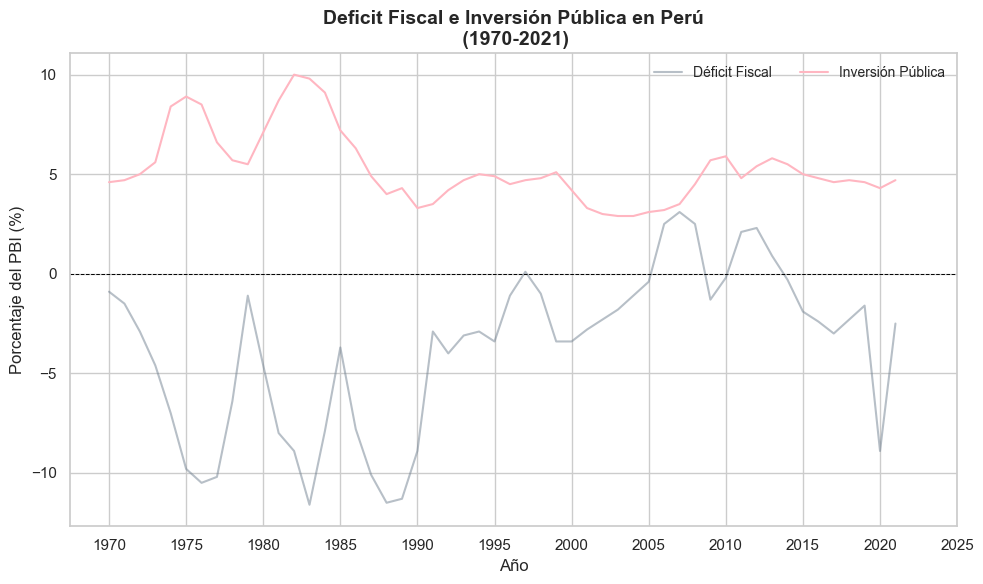

In [54]:
#Gráfico 1:
plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")
plt.plot(df.Año[48:], df.Resultado_económico_SPNF_por_pbi[48:], label="Déficit Fiscal", color='slategray', alpha=0.5)
plt.plot(df.Año[48:], df.Inversión_Pública_por_pbi [48:], label='Inversión Pública', color='lightpink' )
plt.title("Deficit Fiscal e Inversión Pública en Perú\n (1970-2021)", fontsize = 14, fontweight = "bold")
plt.xlabel("Año")
x_ticks_10 = [i for i in range(1970,2026,5)]
plt.xticks(x_ticks_10)
plt.ylabel("Porcentaje del PBI (%)")
plt.legend(frameon=False, loc='upper right', ncol=2, fontsize=10)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

Este primer gráfico muestra que el Perú se caracteriza por ser un país en déficit, siendo muy pocos los años en los que se ha encontrado en superávit. Y por su parte la inversión pública tiene un porcentaje considerable del PBI. La primera mitad del gráfico muestra que siguen tendencias contrarias, es decir en la medida en que la inversión pública aumenta, el déficit también lo hace (Dado que es negativo la mayor parte del tiempo, su valor absoluto incrementa). 

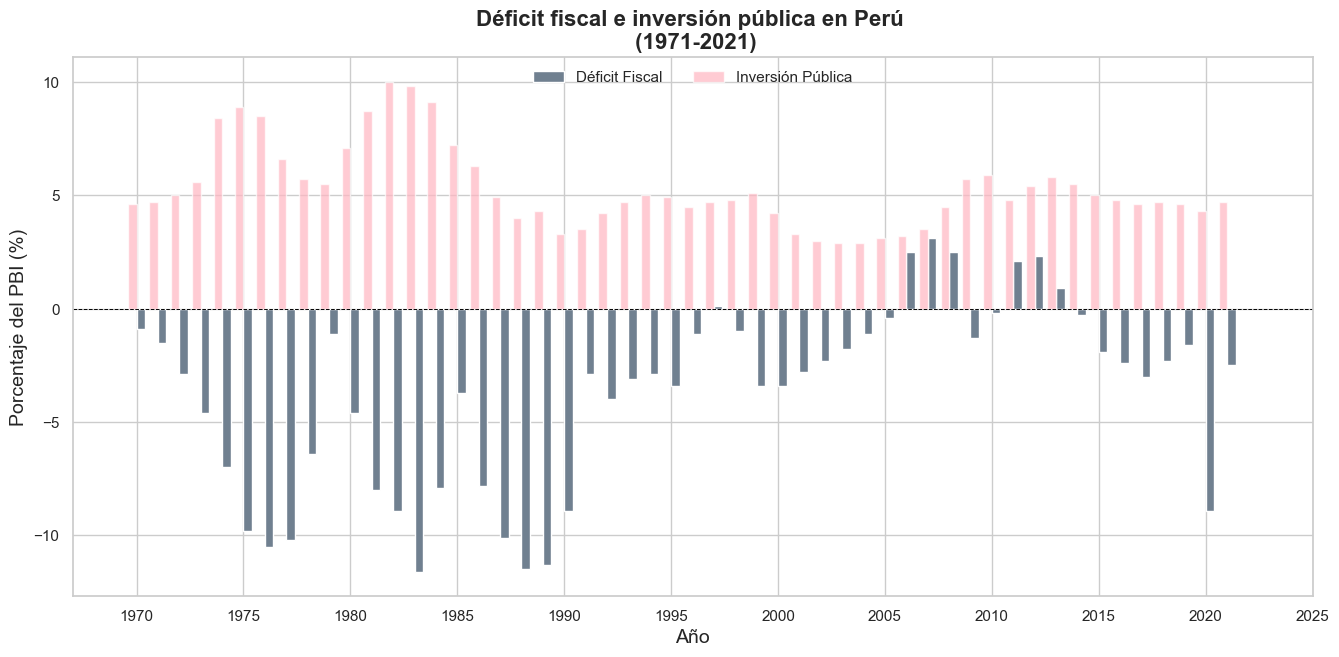

In [56]:
#Gráfico 2
plt.figure(figsize=(16,7))
x=df.Año[48:].astype(int)
y1=df["Resultado_económico_SPNF_por_pbi"][48:]
y2=df["Inversión_Pública_por_pbi"][48:]
bars1=plt.bar(x+0.2, y1, color="slategray", width=0.4, label="Déficit Fiscal")
bars2=plt.bar(x-0.2, y2, color="lightpink", alpha=0.7, width=0.4, label="Inversión Pública")

plt.title("Déficit fiscal e inversión pública en Perú \n (1971-2021)", fontsize=16, fontweight = "bold")
plt.xlabel('Año', fontsize=14)
plt.ylabel("Porcentaje del PBI (%)",  fontsize=14)
x_ticks_4 = [i for i in range(1970,2026,5)]
## Manipulando el eje X
plt.xlabel('Año')
plt.xticks(x_ticks_4) 

plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
#plt.yticks(fontsize=8)
plt.legend(frameon=False, loc='upper center', ncol=2)


Este segundo gráfico muestra mejor, lo explicado anteriormente correspondiente que a que parecen ser opuestos. Y esta tendencia se ha mantendio así exceptuando desde 2006 en adelante en que Perú tuvo un periodo de superávits, raros para el Perú como se puede notar en los pocos años que se consigue. Es evidente que hay una relación y es que la deuda pública se pide para poder invertirla en obras que puedan beneficiar al país. En ese sentido, se espera que si la inversión pública aumenta, el déficit fiscal también lo hará.